In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import xgboost as xgb
import pycountry as pc
import warnings
warnings.filterwarnings('ignore')
from pandas import DataFrame, read_csv
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import VotingClassifier
import matplotlib.ticker as mtick
pd.options.display.max_columns = None

import folium
from folium.plugins import HeatMap
#import plotly.express as px
%matplotlib inline

plt.style.use('fivethirtyeight')
%matplotlib inline
pd.set_option('display.max_columns', 32)

In [4]:
df = pd.read_csv('hotel_bookings.csv')
print(df)

               hotel  is_canceled  lead_time  arrival_date_year  \
0       Resort Hotel            0        342               2015   
1       Resort Hotel            0        737               2015   
2       Resort Hotel            0          7               2015   
3       Resort Hotel            0         13               2015   
4       Resort Hotel            0         14               2015   
...              ...          ...        ...                ...   
119385    City Hotel            0         23               2017   
119386    City Hotel            0        102               2017   
119387    City Hotel            0         34               2017   
119388    City Hotel            0        109               2017   
119389    City Hotel            0        205               2017   

       arrival_date_month  arrival_date_week_number  \
0                    July                        27   
1                    July                        27   
2                    July     

In [5]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [6]:
df.shape

(119390, 32)

In [7]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


37 % of the people have cancelled their booking as per the dataset.
Avg. lead time is 104 days, that is almost 3.5 months.
Each booking has on an average 1.8 adults and 0.1 children.
Only 3% of the guests are repeated.
Median lead time is 69 days.

**MAJOR OBSERVATIONS:**

1.Number of bookings made were highest in the month of July and August and lowest in January.
2.Bookings were more for the City hotel than the Resort hotel.
3.41.7% of the total bookings were cancelled for City hotel and 21.7% for the Resort hotel.
4.Number of days that elapsed between the entering date of the booking and the arrival date is less for the people who cancelled.
5.As the hotels are in Portugal Europe, the bookings are mostly with European countries, Highest is Portugal with 48.59k bookings.
6.77% of the bookings are made with bed and breakfast.
7.Only 3% are repeated guests.

**EXPLORATORY DATA ANALYSIS**

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [9]:
# dealing with null values 
null = pd.DataFrame({'Count of Missing values' : df.isna().sum(), 'Percentage of missing values' : (df.isna().sum()) / (df.shape[0]) * (100)})
null

,Count of Missing values,Percentage of missing values
hotel,0,0.000000
is_canceled,0,0.000000
lead_time,0,0.000000
arrival_date_year,0,0.000000
arrival_date_month,0,0.000000
arrival_date_week_number,0,0.000000
arrival_date_day_of_month,0,0.000000
stays_in_weekend_nights,0,0.000000
stays_in_week_nights,0,0.000000
adults,0,0.000000


Dealing with missing values

In [10]:
hotel = df.drop(columns=['company']) 
hotel

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,0,Transient,104.40,0,0,Check-Out,2017-09-07


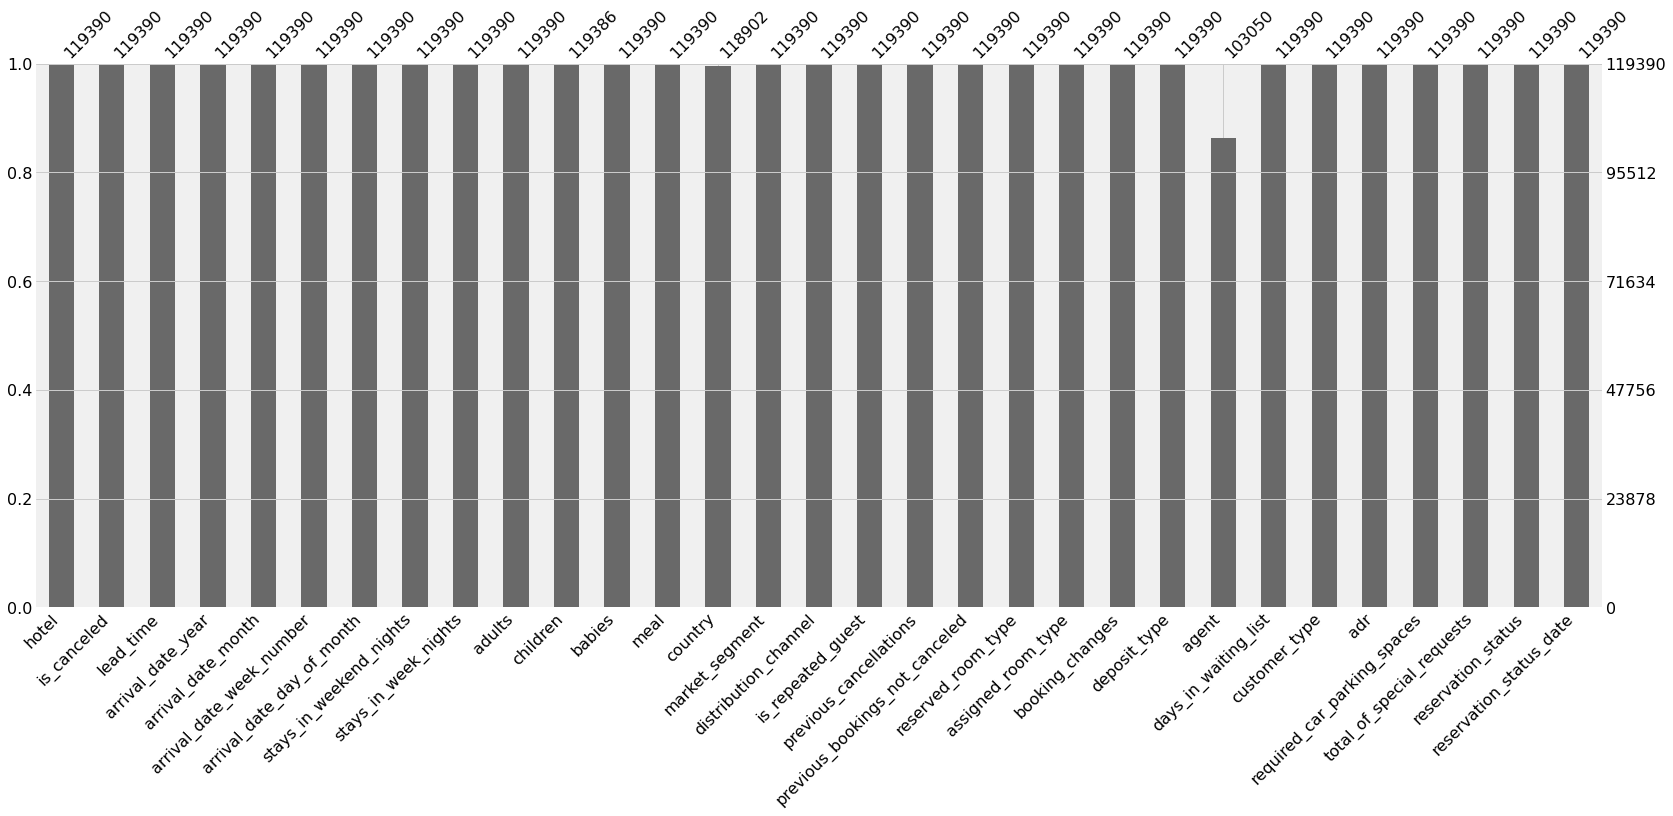

In [11]:
#Lets use Missingno library which offers a fair visualization of the distribution of NaN values.
msno.bar(hotel)
plt.show()

We have almost 120,000 observations, its kind of difficult to make any observation regarding the columns containing NaN values. So, we shall check the distribution of these coloumns individually. 

In [12]:
hotel['children'].value_counts()

0.0     110796
1.0       4861
2.0       3652
3.0         76
10.0         1
Name: children, dtype: int64

In [13]:
hotel['children'].fillna(0,inplace=True) #In order to deal with the missing information in childres's column, we fill it with 0 as we see maximum travellers had 0 children 

In [14]:
hotel['country'].value_counts()

PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
NIC        1
SLE        1
MLI        1
HND        1
BHS        1
Name: country, Length: 177, dtype: int64

In [15]:
hotel['country'].fillna(hotel['country'].mode()[0], inplace=True) # Since, only 0.4% rows are missing from 'country' column we shall replace it using its mode value 

In [16]:
hotel['agent'].value_counts()

9.0      31961
240.0    13922
1.0       7191
14.0      3640
7.0       3539
         ...  
213.0        1
433.0        1
197.0        1
367.0        1
337.0        1
Name: agent, Length: 333, dtype: int64

In [17]:
hotel['agent'].fillna(0,inplace=True) # For the sake of simplicity, we shall replace the 13% Nan values in column agent with '0'

In [18]:
#Rechecking if the null values are handled properly 
missing = pd.DataFrame({'Count of Missing values' : hotel.isna().sum()})
missing

,Count of Missing values
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


In [19]:
# There are a few rows where  number of adults is zero, Hence, trying to remove such rows 
filter = (hotel.children == 0) & (hotel.adults == 0) & (hotel.babies == 0)
hotel[filter]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2224,Resort Hotel,0,1,2015,October,41,6,0,3,0,0.0,0,SC,PRT,Corporate,Corporate,0,0,0,A,I,1,No Deposit,0.0,0,Transient-Party,0.00,0,0,Check-Out,2015-10-06
2409,Resort Hotel,0,0,2015,October,42,12,0,0,0,0.0,0,SC,PRT,Corporate,Corporate,0,0,0,A,I,0,No Deposit,0.0,0,Transient,0.00,0,0,Check-Out,2015-10-12
3181,Resort Hotel,0,36,2015,November,47,20,1,2,0,0.0,0,SC,ESP,Groups,TA/TO,0,0,0,A,C,0,No Deposit,38.0,0,Transient-Party,0.00,0,0,Check-Out,2015-11-23
3684,Resort Hotel,0,165,2015,December,53,30,1,4,0,0.0,0,SC,PRT,Groups,TA/TO,0,0,0,A,A,1,No Deposit,308.0,122,Transient-Party,0.00,0,0,Check-Out,2016-01-04
3708,Resort Hotel,0,165,2015,December,53,30,2,4,0,0.0,0,SC,PRT,Groups,TA/TO,0,0,0,A,C,1,No Deposit,308.0,122,Transient-Party,0.00,0,0,Check-Out,2016-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115029,City Hotel,0,107,2017,June,26,27,0,3,0,0.0,0,BB,CHE,Online TA,TA/TO,0,0,0,A,A,1,No Deposit,7.0,0,Transient,100.80,0,0,Check-Out,2017-06-30
115091,City Hotel,0,1,2017,June,26,30,0,1,0,0.0,0,SC,PRT,Complementary,Direct,0,0,0,E,K,0,No Deposit,0.0,0,Transient,0.00,1,1,Check-Out,2017-07-01
116251,City Hotel,0,44,2017,July,28,15,1,1,0,0.0,0,SC,SWE,Online TA,TA/TO,0,0,0,A,K,2,No Deposit,425.0,0,Transient,73.80,0,0,Check-Out,2017-07-17
116534,City Hotel,0,2,2017,July,28,15,2,5,0,0.0,0,SC,RUS,Online TA,TA/TO,0,0,0,A,K,1,No Deposit,9.0,0,Transient-Party,22.86,0,1,Check-Out,2017-07-22


In [20]:
#Removing these rows with 0 adults, 0 children and babies
hotel = hotel[~filter]
hotel

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0.0,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0.0,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,0,Transient,104.40,0,0,Check-Out,2017-09-07


After dealing with the null values and dropping few unwanted rows the new shape of our dataset is **(119210,31)**

In [21]:
## Converting Datatype: Children are listed as float datatypre but in reality its interger, so needs to be changed

hotel['children'] = hotel['children'].astype('int64')
hotel['agent'] = hotel['agent'].astype('int64')
hotel['country'] = hotel['country'].astype('str')
hotel ['reservation_status_date'] = hotel['reservation_status_date'].astype('datetime64')
#looking at the reservation_status_date we can see it doesnt have correct Dtype, hence we need to change it to datetime 64
hotel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119210 entries, 0 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119210 non-null  object        
 1   is_canceled                     119210 non-null  int64         
 2   lead_time                       119210 non-null  int64         
 3   arrival_date_year               119210 non-null  int64         
 4   arrival_date_month              119210 non-null  object        
 5   arrival_date_week_number        119210 non-null  int64         
 6   arrival_date_day_of_month       119210 non-null  int64         
 7   stays_in_weekend_nights         119210 non-null  int64         
 8   stays_in_week_nights            119210 non-null  int64         
 9   adults                          119210 non-null  int64         
 10  children                        119210 non-null  int64  

**Data Visualization**

Text(0, 0.5, 'Counts')

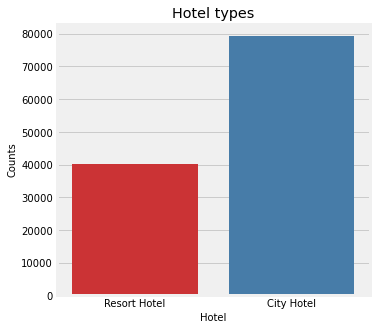

In [22]:
plt.figure(figsize=(5,5))
sns.countplot(x = 'hotel', data = hotel, palette = 'Set1')
plt.title('Hotel types')
plt.xlabel('Hotel', fontsize = 10)
plt.ylabel('Counts', fontsize = 10)

In [23]:
hotel['hotel'].value_counts()/hotel.shape[0]*100

City Hotel      66.406342
Resort Hotel    33.593658
Name: hotel, dtype: float64

66 % reservations were made for city hotel and the remaining 34% for the Resort Hotel, which means higher number of reservations were made for the City Hotel

In [24]:
hotel['is_canceled'].value_counts()/hotel.shape[0]*100 

0    62.923412
1    37.076588
Name: is_canceled, dtype: float64

63% of the total reservations were not canceled and 37% were canceled combined from both the hotels

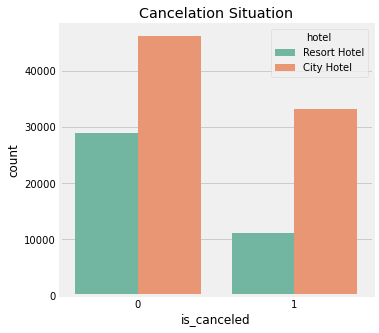

In [25]:
#Checking the cancelation status
plt.figure(figsize=(5,5))
sns.countplot(x='is_canceled' , hue= 'hotel', data = hotel, palette = 'Set2')
plt.title('Cancelation Situation')
plt.show()

Higher number of "cancelations" and "not cancelations" were made for the City Hotel

In [26]:
#calculation of ratio of uncanceled and canceled bookings at City and Resort Hotels
a = hotel [hotel['is_canceled']==0].groupby('hotel').is_canceled.count()
b = hotel [hotel['is_canceled']==1].groupby('hotel').is_canceled.count()

data = pd.DataFrame({'hotel':a.index,
                     '0':a.values,
                     '1':b.values
                    })
data["Ratio of uncanceled bookings"] = data['0']/( data['0']+ data['1'])
data["Ratio of canceled bookings"] = data['1']/( data['0']+ data['1'])
data

,hotel,0,1,Ratio of uncanceled bookings,Ratio of canceled bookings
0,City Hotel,46084,33079,0.582141,0.417859
1,Resort Hotel,28927,11120,0.722326,0.277674


Looking at the ratio of cancelations it can be noted that higher cancelations were observed in City Hotel as compared to Resort Hotel. 

In [27]:
country_wise_guests = hotel[hotel['is_canceled'] == 0]['country'].value_counts().reset_index()
country_wise_guests.columns = ['Country', 'Total no of guests']
country_wise_guests

,Country,Total no of guests
0,PRT,21398
1,GBR,9668
2,FRA,8468
3,ESP,6383
4,DEU,6067
...,...,...
160,MMR,1
161,SLE,1
162,NPL,1
163,DJI,1


Tourists are traveling from across the globe to stay at these hotels. Home country for most of the guests is Portugal along with other countries in Europe.

Text(0, 0.5, 'Count')

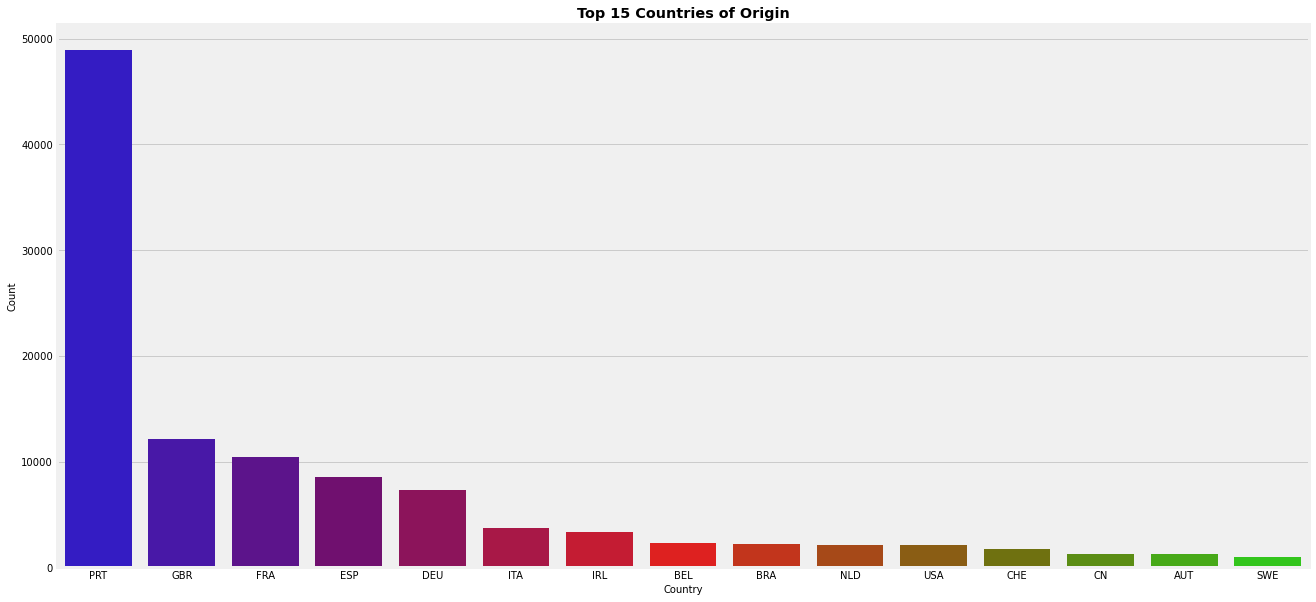

In [29]:
# Plotting these countries on a graph 
plt.figure(figsize=(20,10))
sns.countplot(x='country', data=hotel, 
              order=pd.value_counts(hotel['country']).iloc[:15].index, palette="brg")
plt.title('Top 15 Countries of Origin', weight='bold')
plt.xlabel('Country', fontsize=10)
plt.ylabel('Count', fontsize=10)

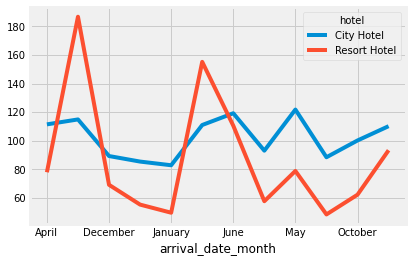

In [30]:
#Comparison of average daily charges of two hotels by month
hotel.pivot_table(values='adr',index='arrival_date_month',columns='hotel',aggfunc='mean').plot()

Prices at both the hotels are quite variable. It can be noted that ADR is higher in July and August months since 2015. 

**Comparing the turnover of two hotels from 2015-2017**

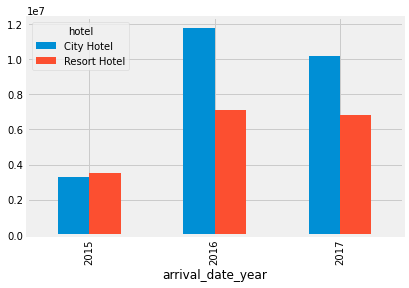

In [33]:
hotel['total_adr']=(hotel['stays_in_weekend_nights']+hotel['stays_in_week_nights'])*hotel['adr']
hotel.pivot_table(values='total_adr',index='arrival_date_year',columns='hotel',aggfunc='sum').plot.bar()
plt.show()

The turnover in the 2016 and 2017 was higher for City hotel, but lower in 2015 as compared Resort Hotel 

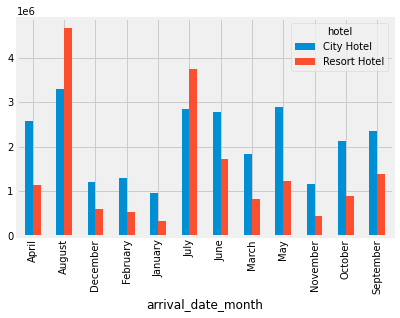

In [34]:
hotel.pivot_table(values='total_adr',index='arrival_date_month',columns='hotel',aggfunc='sum').plot.bar()
plt.show()

Resort Hotel has higher turnover than City Hotel in the months July and August and in the rest of the months City Hotel makes higher revenues. 

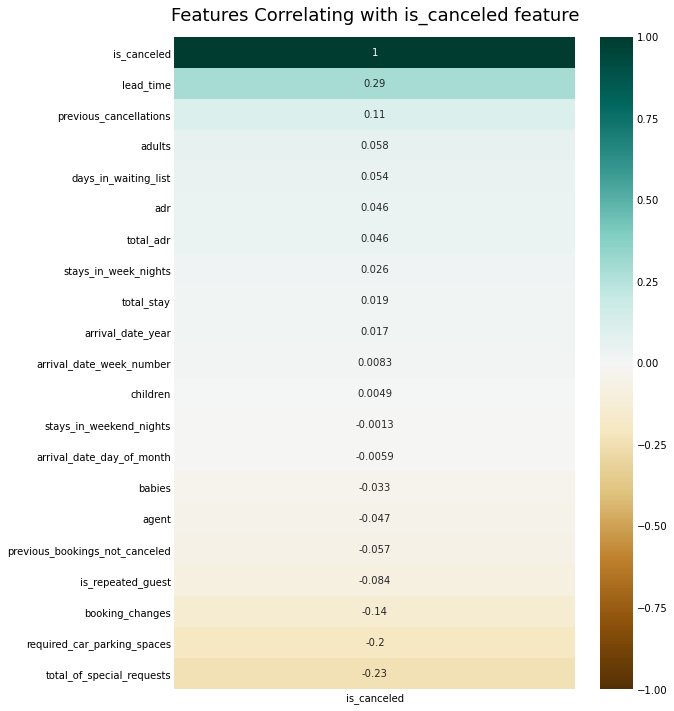

In [77]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(hotel.corr()[['is_canceled']].sort_values(by='is_canceled', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with is_canceled feature', fontdict={'fontsize':18}, pad=16);

**Rearranging the data by 'Month'**

In [35]:
pip install sort-dataframeby-monthorweek

Processing ./.cache/pip/wheels/de/e1/ad/5fe265a9780676079c4b8caaaffaa8d5c4ab2f37cf823e8aa8/sort_dataframeby_monthorweek-0.4-py3-none-any.whl
Note: you may need to restart the kernel to use updated packages.


In [36]:
 pip install sorted-months-weekdays

Processing ./.cache/pip/wheels/4f/4f/78/3f1b8fc72651f7c766a6f73d667fccb12a8aabe240b38df7a4/sorted_months_weekdays-0.2-py3-none-any.whl
Note: you may need to restart the kernel to use updated packages.


In [37]:
from sorted_months_weekdays import *

from sort_dataframeby_monthorweek import *

final = Sort_Dataframeby_Month(df=df,monthcolumnname='arrival_date_month')
final.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,109,2016,January,1,1,0,1,2,0.0,0,BB,RUS,Online TA,TA/TO,0,0,0,A,D,0,No Deposit,240.0,NaN,0,Transient-Party,59.94,0,1,Check-Out,2016-01-02
1,Resort Hotel,0,109,2016,January,1,1,0,1,2,2.0,0,BB,RUS,Online TA,TA/TO,0,0,0,H,H,0,No Deposit,240.0,NaN,0,Transient-Party,116.10,1,1,Check-Out,2016-01-02
2,Resort Hotel,1,2,2016,January,1,1,0,1,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,240.0,NaN,0,Transient,89.00,0,1,No-Show,2016-01-01
3,Resort Hotel,0,88,2016,January,1,1,0,2,2,0.0,0,HB,ARG,Online TA,TA/TO,0,0,0,A,D,0,No Deposit,241.0,NaN,0,Transient,73.46,0,2,Check-Out,2016-01-03
4,Resort Hotel,1,20,2016,January,1,1,0,2,2,2.0,0,BB,PRT,Online TA,TA/TO,0,0,0,G,G,0,No Deposit,240.0,NaN,0,Transient,119.00,0,0,Canceled,2015-12-22


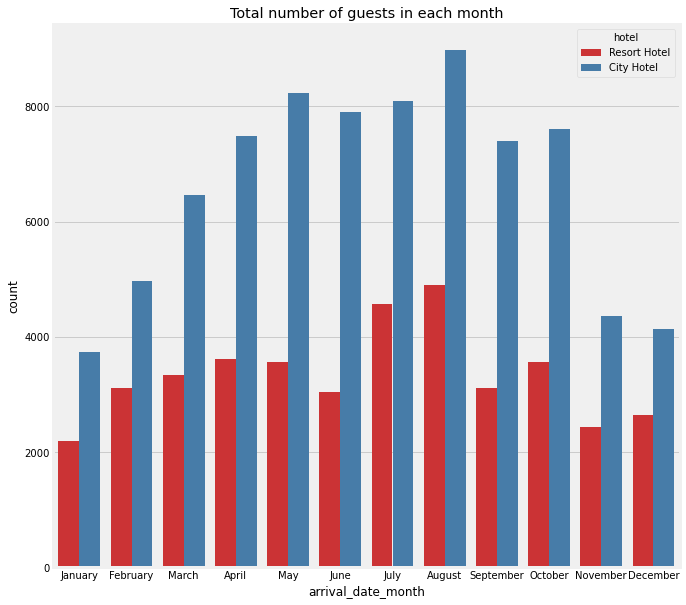

In [38]:
plt.figure(figsize=(10,10))
sns.countplot(x='arrival_date_month',  hue= 'hotel', data= final, palette = "Set1")
plt.title('Total number of guests in each month')
plt.show()

Observing the bar chart we can see that Resort Hotel gets busy in July and September, whereas demand in the city hotel stays from May to October. 

**Price variation per night  at both the hotels**

In [39]:
data_city =final[(final['hotel'] == 'City Hotel') & (final['is_canceled'] == 0)]
data_resort =final[(final['hotel'] == 'Resort Hotel') & (final['is_canceled'] == 0)]

city_hotel = data_city.groupby(['arrival_date_month'])['adr'].mean().reset_index()
resort_hotel = data_resort.groupby(['arrival_date_month'])['adr'].mean().reset_index()

final_hotel = city_hotel.merge(resort_hotel, on = 'arrival_date_month')
final_hotel.columns = ['arrival_date_month', 'price_for_city_hotel', 'price_for_resort']
price_per_night = Sort_Dataframeby_Month(df=final_hotel,monthcolumnname='arrival_date_month')
price_per_night

,arrival_date_month,price_for_city_hotel,price_for_resort
0,January,82.160634,48.708919
1,February,86.183025,54.147478
2,March,90.170722,57.012487
3,April,111.856824,75.867816
4,May,120.445842,76.657558
5,June,117.702075,107.921869
6,July,115.563810,150.122528
7,August,118.412083,181.205892
8,September,112.598452,96.416860
9,October,101.745956,61.727505


Throughout the year price per night was higher at City Hotel in comparison to Resort Hotel, except for the months 'July and August.

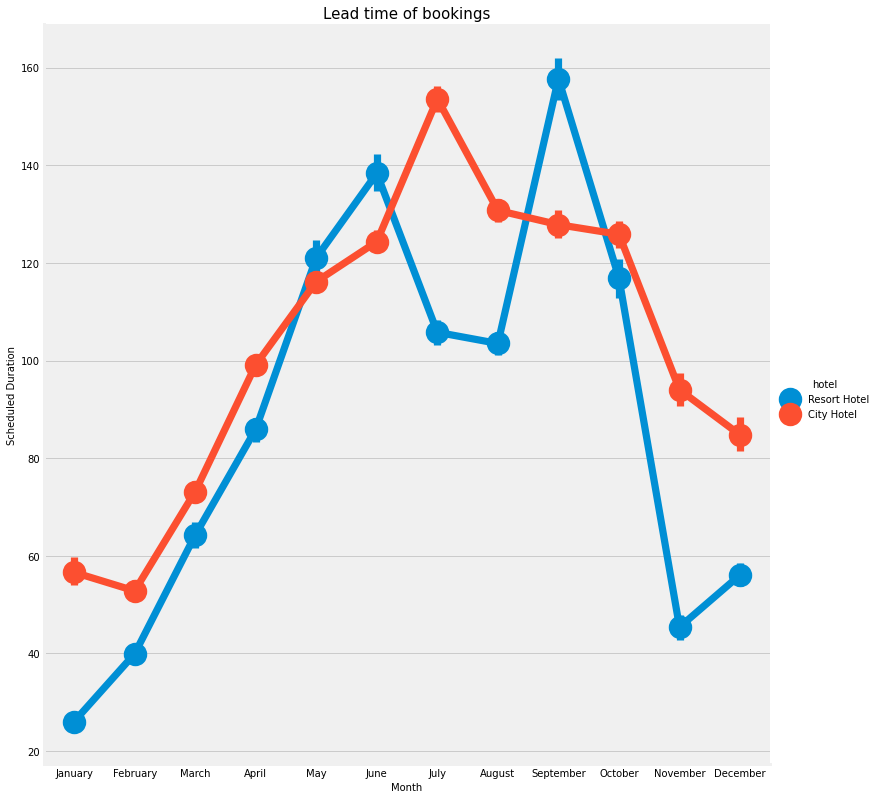

In [40]:
sns.factorplot(x='arrival_date_month',y='lead_time', hue='hotel', data =final,size=11)
plt.title("Lead time of bookings", fontsize=15)
plt.xlabel("Month", fontsize=10)
plt.ylabel("Scheduled Duration", fontsize=10)
plt.show()

Guests tend to make reservations in advance for June to October in City and Hotel and June and September for Resort Hotel

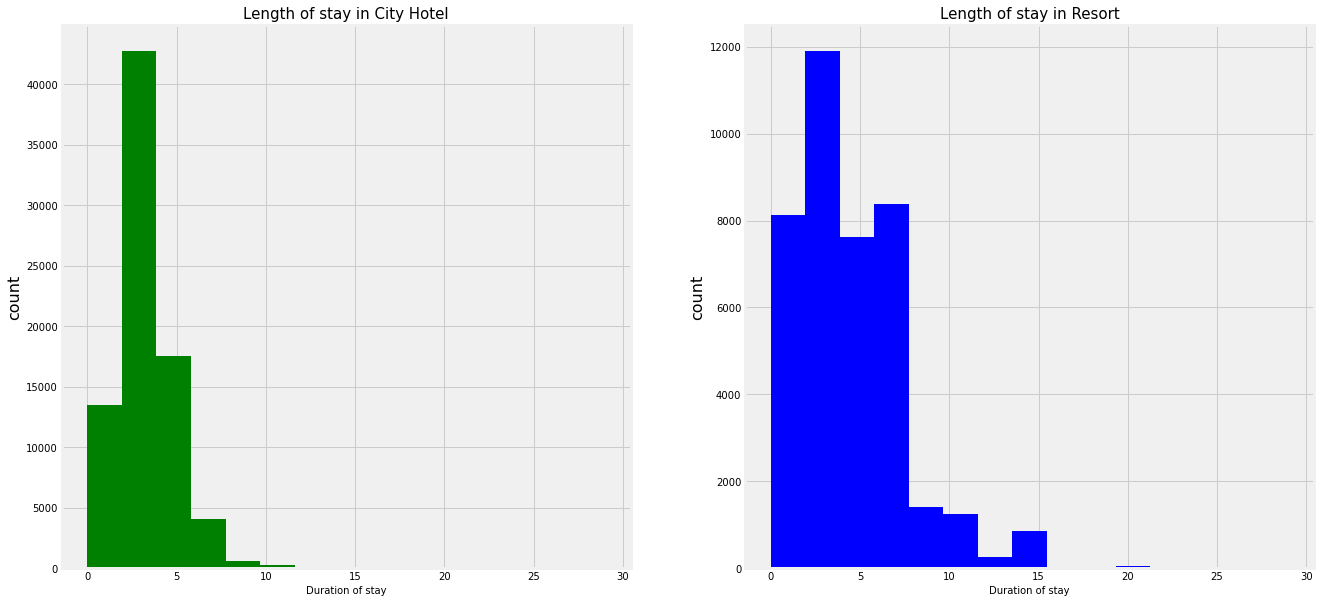

In [41]:
hotel['total_stay']=hotel['stays_in_weekend_nights']+hotel['stays_in_week_nights']
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
hotel.query("total_stay<30&hotel=='City Hotel'").total_stay.plot.hist(bins=15,color='g')
plt.title("Length of stay in City Hotel", fontsize=15)
plt.xlabel("Duration of stay", fontsize=10)
plt.ylabel("count", fontsize=16)
plt.subplot(1,2,2)
hotel.query("total_stay<30&hotel=='Resort Hotel'").total_stay.plot.hist(bins=15,color='b')
plt.title("Length of stay in Resort", fontsize=15)
plt.xlabel("Duration of stay", fontsize=10)
plt.ylabel("count", fontsize=16)
plt.show()

Guests prefer to stay longer in Resort Hotel as compared to City Hotel. On an average, guests syat at City Hotel for 2.92 nights and 4.14 nights at Resort Hotel. For resort hotel, often 1-4 nights are booked for both City and Resort Hotels.  

In [64]:
#Reserved Room Type vs Assigned Room Type
df2 = pd.crosstab(index = hotel['reserved_room_type'], columns = hotel['assigned_room_type'],normalize='index').round(2)*100
df2

assigned_room_type,A,B,C,D,E,F,G,H,I,K,L
reserved_room_type,,,,,,,,,,,
A,86.0,1.0,2.0,9.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
B,10.0,88.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
C,1.0,0.0,95.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
D,2.0,0.0,0.0,92.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0
E,0.0,0.0,0.0,0.0,91.0,6.0,2.0,0.0,1.0,0.0,0.0
F,0.0,0.0,0.0,0.0,1.0,94.0,4.0,0.0,0.0,0.0,0.0
G,0.0,0.0,0.0,0.0,0.0,1.0,98.0,0.0,1.0,0.0,0.0
H,0.0,0.0,0.0,0.0,0.0,0.0,2.0,97.0,1.0,0.0,0.0
L,17.0,17.0,17.0,0.0,0.0,17.0,0.0,17.0,0.0,0.0,17.0


The above cross table shows the reserved type of room distribution over assigned room type. Almost at all the occassions guests received the same room type as they booked. 

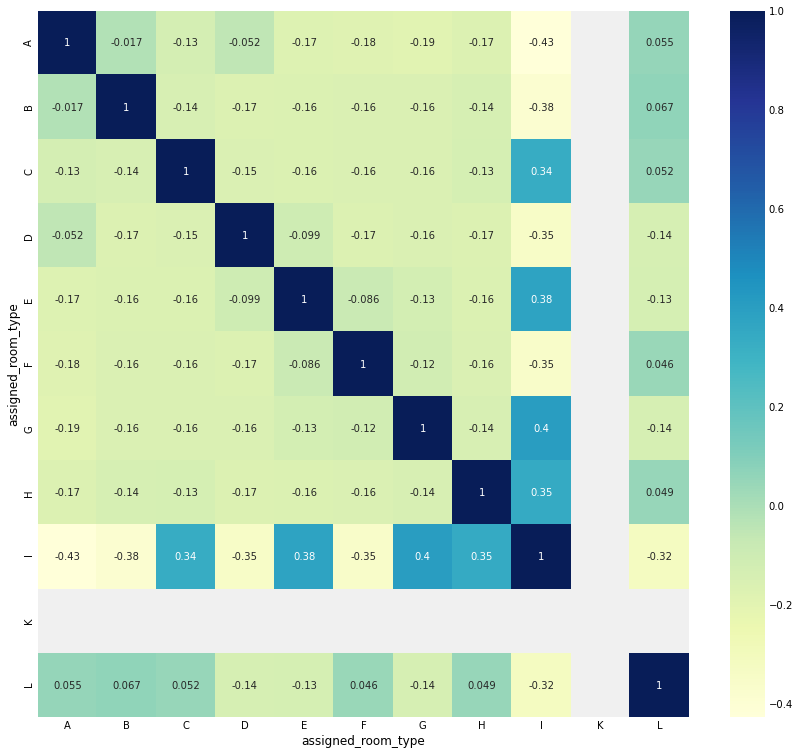

In [92]:
#Heatmap for the dataset of Reserved Room Type vs Assigned Room Type
plt.figure(figsize=(13,13))
dataplot = sb.heatmap(df2.corr(), cmap="YlGnBu", annot=True)
# displaying heatmap
mp.show()

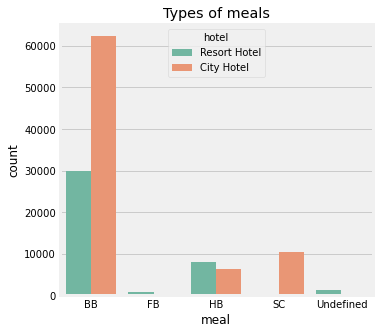

In [93]:
plt.figure(figsize=(5,5))
sns.countplot(x='meal',  hue= 'hotel', data= hotel, palette = "Set2")
plt.title('Types of meals')
plt.show()

Maximum tourists requested for 'Bed and Breakfast' at both the hotels

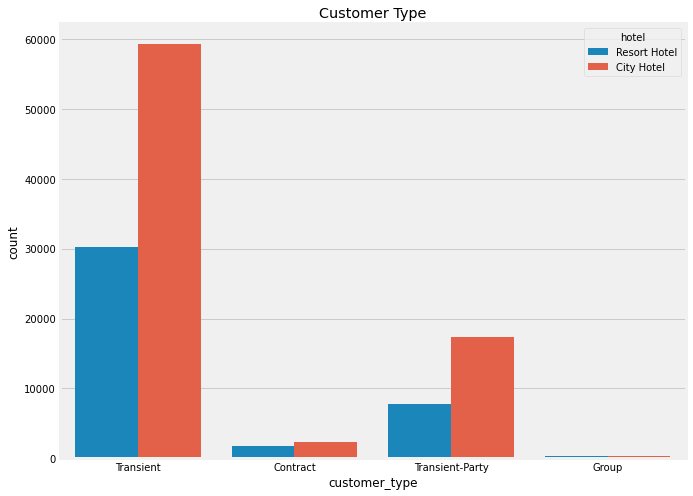

In [94]:
plt.figure(figsize=(10,8))
sns.countplot(x='customer_type', hue = 'hotel', data = hotel)
plt.title('Customer Type')
plt.show()

Most of the guests are transient at both the hotels, which indicates that they are walk-in guests or they booked last muinute. Also, they aren't a part of some group or contract transient booking. 

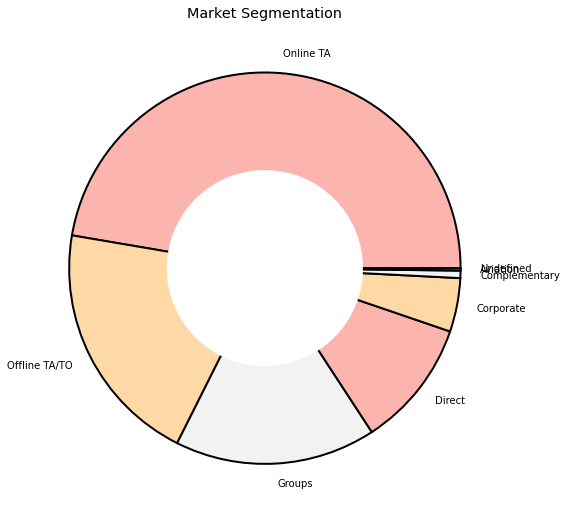

In [95]:
market_segment_labels= ['Online TA', 'Offline TA/TO', 'Groups', 'Direct', 'Corporate', 'Complementary',
                        'Aviation','Undefined']
size = hotel['market_segment'].value_counts()
plt.figure(figsize=(9,9))
cmap =plt.get_cmap("Pastel1")
colors = cmap(np.arange(3)*4)
my_circle= plt.Circle( (0,0), .5, color='white')
plt.pie(size, labels=market_segment_labels, colors=colors, wedgeprops = { 'linewidth' : 2, 'edgecolor' : 'black' })
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Market Segmentation')
plt.show()

Text(0, 0.5, 'required_car_parking_spaces')

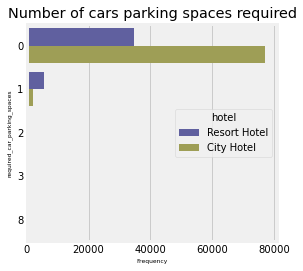

In [96]:
#Required parking spaces 
plt.figure(figsize=(4,4))
sns.countplot(y='required_car_parking_spaces', hue = 'hotel', data= hotel, palette='gist_stern', orient = 'v')
plt.title('Number of cars parking spaces required')
plt.xlabel('Frequency', fontsize=6)
plt.ylabel('required_car_parking_spaces', fontsize=6)

Majority of the guests travelling to these hotels donot require car parking spaces. Few guests need 1 car parking at Resort Hotel as per the graph. 

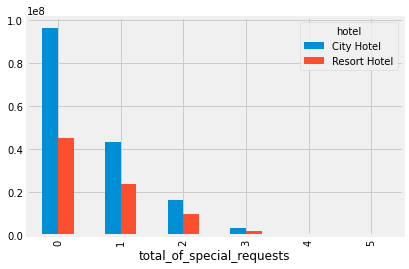

In [97]:
#Number of special requests :
hotel.pivot_table(values='arrival_date_year',index='total_of_special_requests',columns='hotel',aggfunc='sum').plot.bar()

Text(0, 0.5, 'Count')

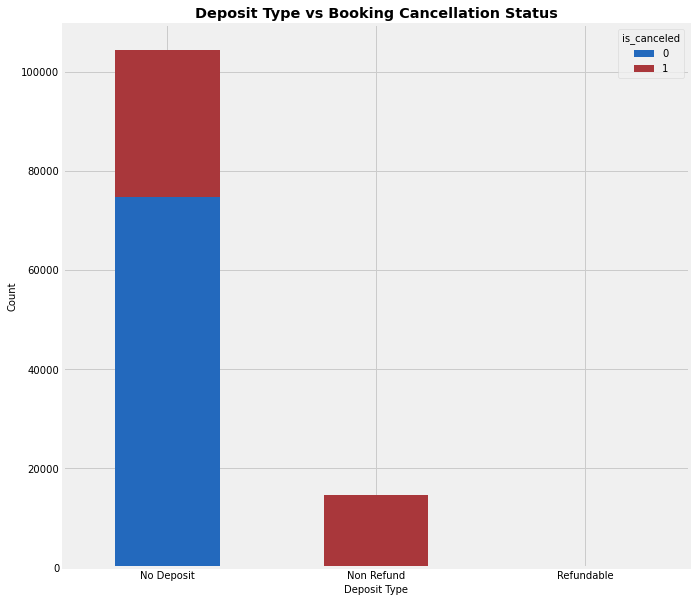

In [98]:
group_deposit = hotel.groupby(['deposit_type', 'is_canceled']).size().unstack(fill_value=0)
group_deposit.plot(kind='bar', stacked=True, cmap='vlag', figsize=(10,10))
plt.title('Deposit Type vs Booking Cancellation Status', weight='bold')
plt.xlabel('Deposit Type', fontsize=10)
plt.xticks(rotation=360)
plt.ylabel('Count', fontsize=10)

For the variable 'is_canceled' 1(red) color stands for booking was canceled, we observe that lower bookings were canceled even when No Deposit was made for the booking

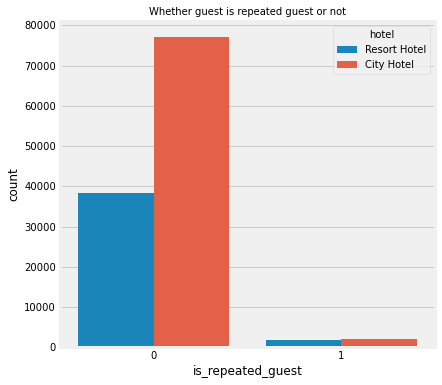

In [99]:
plt.figure(figsize=(6,6))
sns.countplot(data = hotel, x = 'is_repeated_guest', hue = 'hotel').set_title('Whether guest is repeated guest or not', fontsize = 10)
plt.show()

There weren't many repeated guests at both the hotels. 

**Correlation Matrix**

Next, categorical varibales shall be converted to numerical form in order to utilize such variables in maching readable form. For this purpose, Label Encoding method will be implemented, it is an important pre-processing step for the structured dataset in supervised machine learning algorithms. 

In [100]:
from sklearn import preprocessing
  
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in all the categorical columns
hotel['hotel']= label_encoder.fit_transform(hotel['hotel'])
hotel['arrival_date_month']= label_encoder.fit_transform(hotel['arrival_date_month'])
hotel['meal']= label_encoder.fit_transform(hotel['meal'])
hotel['country']= label_encoder.fit_transform(hotel['country'])
hotel['market_segment']= label_encoder.fit_transform(hotel['market_segment'])
hotel['distribution_channel']= label_encoder.fit_transform(hotel['distribution_channel'])
hotel['is_repeated_guest']= label_encoder.fit_transform(hotel['is_repeated_guest'])
hotel['reserved_room_type']= label_encoder.fit_transform(hotel['reserved_room_type'])
hotel['assigned_room_type']= label_encoder.fit_transform(hotel['deposit_type'])
hotel['deposit_type']= label_encoder.fit_transform(hotel['is_repeated_guest'])
hotel['agent']= label_encoder.fit_transform(hotel['agent'])
hotel['customer_type']= label_encoder.fit_transform(hotel['customer_type'])
hotel['reservation_status']= label_encoder.fit_transform(hotel['reservation_status'])


In [101]:
#Creating new dataframe for categorical data
hotel_categorical_data = hotel[['hotel','is_canceled','arrival_date_month','meal',
                                     'country','market_segment','distribution_channel', 
                                     'is_repeated_guest', 'reserved_room_type',
                                     'assigned_room_type','deposit_type','agent',
                                     'customer_type','reservation_status']]
hotel_categorical_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119210 entries, 0 to 119389
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   hotel                 119210 non-null  int64
 1   is_canceled           119210 non-null  int64
 2   arrival_date_month    119210 non-null  int64
 3   meal                  119210 non-null  int64
 4   country               119210 non-null  int64
 5   market_segment        119210 non-null  int64
 6   distribution_channel  119210 non-null  int64
 7   is_repeated_guest     119210 non-null  int64
 8   reserved_room_type    119210 non-null  int64
 9   assigned_room_type    119210 non-null  int64
 10  deposit_type          119210 non-null  int64
 11  agent                 119210 non-null  int64
 12  customer_type         119210 non-null  int64
 13  reservation_status    119210 non-null  int64
dtypes: int64(14)
memory usage: 18.6 MB


In [102]:
#Creating new dataframe for numerical data
hotel_numerical_data= hotel.drop(['hotel','is_canceled', 'arrival_date_month','meal',
                                       'country','market_segment','distribution_channel', 
                                       'is_repeated_guest', 'reserved_room_type', 
                                       'assigned_room_type','deposit_type','agent', 
                                       'customer_type','reservation_status'], axis = 1)
hotel_numerical_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119210 entries, 0 to 119389
Data columns (total 19 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   lead_time                       119210 non-null  int64         
 1   arrival_date_year               119210 non-null  int64         
 2   arrival_date_week_number        119210 non-null  int64         
 3   arrival_date_day_of_month       119210 non-null  int64         
 4   stays_in_weekend_nights         119210 non-null  int64         
 5   stays_in_week_nights            119210 non-null  int64         
 6   adults                          119210 non-null  int64         
 7   children                        119210 non-null  int64         
 8   babies                          119210 non-null  int64         
 9   previous_cancellations          119210 non-null  int64         
 10  previous_bookings_not_canceled  119210 non-null  int64  

Text(0.5, 1.0, 'Correlation Matrix of Categorical Data using Spearman Method')

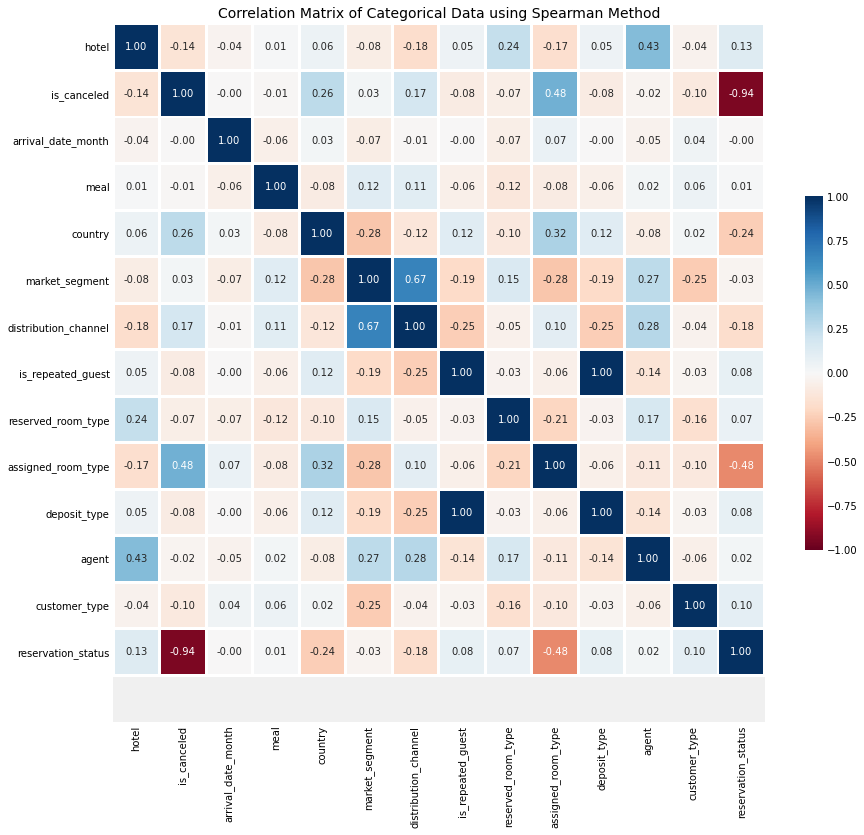

In [111]:
# Correlation Matrix of Categorical Data with Spearman method
plt.figure(figsize=(13,13))
corr_categorical=hotel_categorical_data.corr(method='spearman')
mask_categorical = np.triu(np.ones_like(corr_categorical, dtype=np.bool))
sns.heatmap(corr_categorical, annot=True, fmt=".2f", cmap='RdBu', vmin=-1, vmax=1, center= 0,
            square=True, linewidths=2, cbar_kws={"shrink": .5}).set(ylim=(15, 0))
plt.title("Correlation Matrix of Categorical Data using Spearman Method",size=14)

Text(0.5, 1.0, 'Correlation Matrix of Numerical Data using Pearson Method')

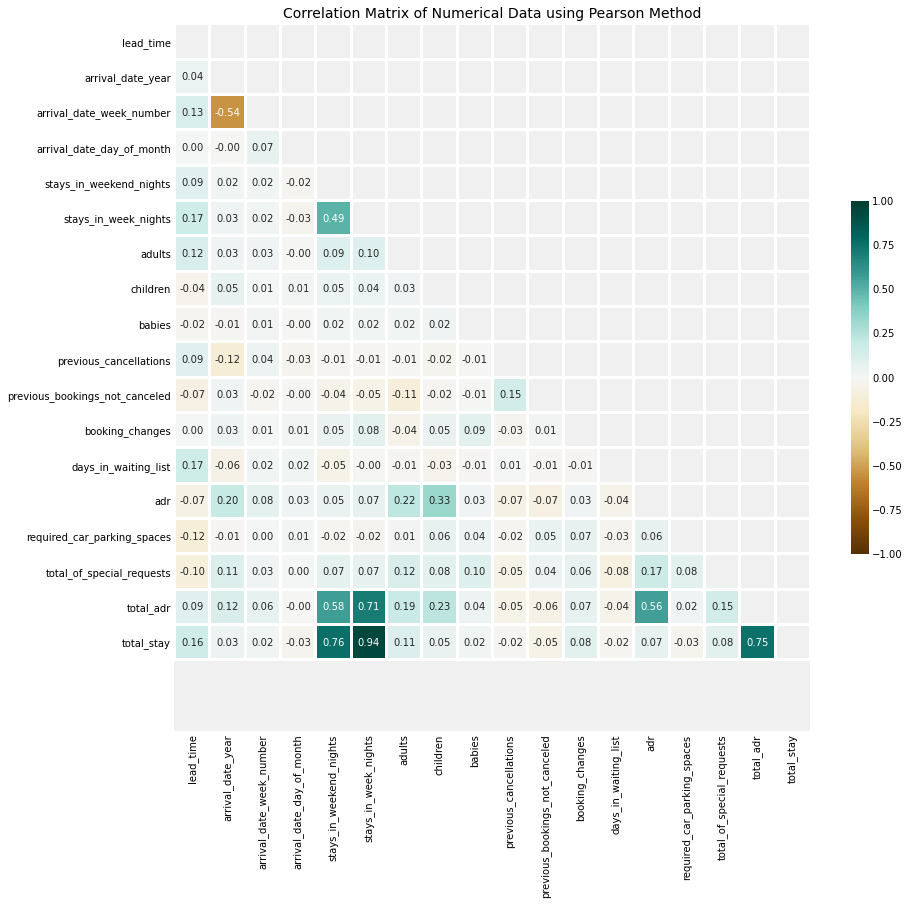

In [112]:
# Correlation Matrix of Numerical Data with Spearman method
plt.figure(figsize=(13,13))
corr_numerical=hotel_numerical_data.corr(method='pearson')
mask_numerical = np.triu(np.ones_like(corr_numerical, dtype=np.bool))
sns.heatmap(corr_numerical, annot=True, fmt=".2f", cmap='BrBG', mask= mask_numerical, vmin=-1, vmax=1, center= 0,
            square=True, linewidths=2, cbar_kws={"shrink": .5}).set(ylim=(20, 0))
plt.title("Correlation Matrix of Numerical Data using Pearson Method",size=14)

In [113]:
corr_mask_categorical = corr_categorical.mask(mask_categorical)
corr_values_categorical = [c for c in corr_mask_categorical.columns if any (corr_mask_categorical[c] > 0.90)]
corr_mask_numerical = corr_numerical.mask(mask_numerical)
corr_values_numerical = [c for c in corr_mask_numerical.columns if any (corr_mask_numerical[c] > 0.90)]
print(corr_values_categorical, corr_values_numerical)

['is_repeated_guest'] ['stays_in_week_nights']


Looking at the first heatmap for categorical variables 'reservation_ status' feature has very high negative correlation with 'is_canceled', so in order avoid over fitting 'reservation_ status' feature shall be dropped. 

As per the results by correlation matrix, we shall even drop 'is_repeated_guest' and 'stays_in_week_nights' as well as 'stay_in_weekday_nights'



In [115]:
hotel_data= hotel.drop(['reservation_status','stays_in_week_nights','stays_in_week_nights'], axis = 1)

In [118]:
hotel_data.shape

(119210, 31)